In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
churndata_df =pd.read_csv(r"D:\portfolio projects\python\tlecom\Churn_Train.csv")
churndata_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,HI,NaN,area_code_408,no,yes,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes


In [3]:
# Handling negative values
churndata_df['number_vmail_messages'] = churndata_df['number_vmail_messages'].abs()
churndata_df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,HI,NaN,area_code_408,no,yes,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,OH,144.0,area_code_415,no,yes,18.0,106.4,109.0,18.09,108.1,113.0,9.19,208.4,111,9.38,10.1,5.0,2.73,1.0,no
3329,LA,69.0,area_code_415,no,yes,37.0,155.0,98.0,26.35,NaN,105.0,12.10,143.7,117,6.47,5.9,4.0,1.59,1.0,no
3330,SD,NaN,area_code_415,no,no,0.0,174.5,98.0,29.67,180.2,103.0,15.32,179.0,89,8.06,10.7,2.0,2.89,2.0,no
3331,NY,39.0,area_code_408,no,no,0.0,2039.6,68.0,27.27,1034.6,103.0,8.72,235.3,106,10.59,9.1,5.0,2.46,2.0,no


In [4]:
churndata_df.isnull().sum()

state                              0
account_length                   501
area_code                          0
international_plan                 0
voice_mail_plan                    0
number_vmail_messages            200
total_day_minutes                200
total_day_calls                  200
total_day_charge                 200
total_eve_minutes                301
total_eve_calls                  200
total_eve_charge                 200
total_night_minutes              200
total_night_calls                  0
total_night_charge               200
total_intl_minutes               200
total_intl_calls                 301
total_intl_charge                200
number_customer_service_calls    200
churn                              0
dtype: int64

In [6]:
churndata_df = pd.DataFrame(churndata_df)
COlumns_needed = churndata_df[['account_length','total_day_minutes','international_plan','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls','churn' ]]
COlumns_needed     

,account_length,total_day_minutes,international_plan,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,125.0,2013.4,no,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,108.0,291.6,no,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,82.0,300.3,no,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,NaN,110.3,no,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,83.0,337.4,no,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,144.0,106.4,no,109.0,18.09,108.1,113.0,9.19,208.4,111,9.38,10.1,5.0,2.73,1.0,no
3329,69.0,155.0,no,98.0,26.35,NaN,105.0,12.10,143.7,117,6.47,5.9,4.0,1.59,1.0,no
3330,NaN,174.5,no,98.0,29.67,180.2,103.0,15.32,179.0,89,8.06,10.7,2.0,2.89,2.0,no
3331,39.0,2039.6,no,68.0,27.27,1034.6,103.0,8.72,235.3,106,10.59,9.1,5.0,2.46,2.0,no


In [7]:
# Fill missing values with median for numeric columns
numeric_cols = ['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
                'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
                'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
                'number_customer_service_calls']
for col in numeric_cols:
    COlumns_needed.loc[:, col] = COlumns_needed[col].fillna(COlumns_needed[col].median())
    # Check for missing values after filling
print("Missing values after filling:\n", COlumns_needed.isnull().sum())

Missing values after filling:
 account_length                   0
total_day_minutes                0
international_plan               0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [8]:
# Convert categorical columns to numeric codes
COlumns_needed.loc[:, "churn"] = COlumns_needed["churn"].astype('category').cat.codes

# Also convert international_plan to numeric codes

COlumns_needed.loc[:, "international_plan"] = COlumns_needed["international_plan"].astype('category').cat.codes
COlumns_needed

,account_length,total_day_minutes,international_plan,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,125.0,2013.4,0,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0
1,108.0,291.6,0,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,1
2,82.0,300.3,0,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,1
3,100.0,110.3,0,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,0
4,83.0,337.4,0,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,144.0,106.4,0,109.0,18.09,108.1,113.0,9.19,208.4,111,9.38,10.1,5.0,2.73,1.0,0
3329,69.0,155.0,0,98.0,26.35,209.9,105.0,12.10,143.7,117,6.47,5.9,4.0,1.59,1.0,0
3330,100.0,174.5,0,98.0,29.67,180.2,103.0,15.32,179.0,89,8.06,10.7,2.0,2.89,2.0,0
3331,39.0,2039.6,0,68.0,27.27,1034.6,103.0,8.72,235.3,106,10.59,9.1,5.0,2.46,2.0,0


In [9]:
corr_matrix = COlumns_needed.corr()
print("Correlation with churn:\n", corr_matrix["churn"])

Correlation with churn:
 account_length                   0.006978
total_day_minutes               -0.011665
international_plan               0.259852
total_day_calls                  0.018710
total_day_charge                 0.197570
total_eve_minutes               -0.010508
total_eve_calls                  0.001926
total_eve_charge                 0.095518
total_night_minutes              0.037572
total_night_calls                0.006141
total_night_charge               0.037574
total_intl_minutes               0.062908
total_intl_calls                -0.047479
total_intl_charge                0.062924
number_customer_service_calls    0.200128
churn                            1.000000
Name: churn, dtype: float64


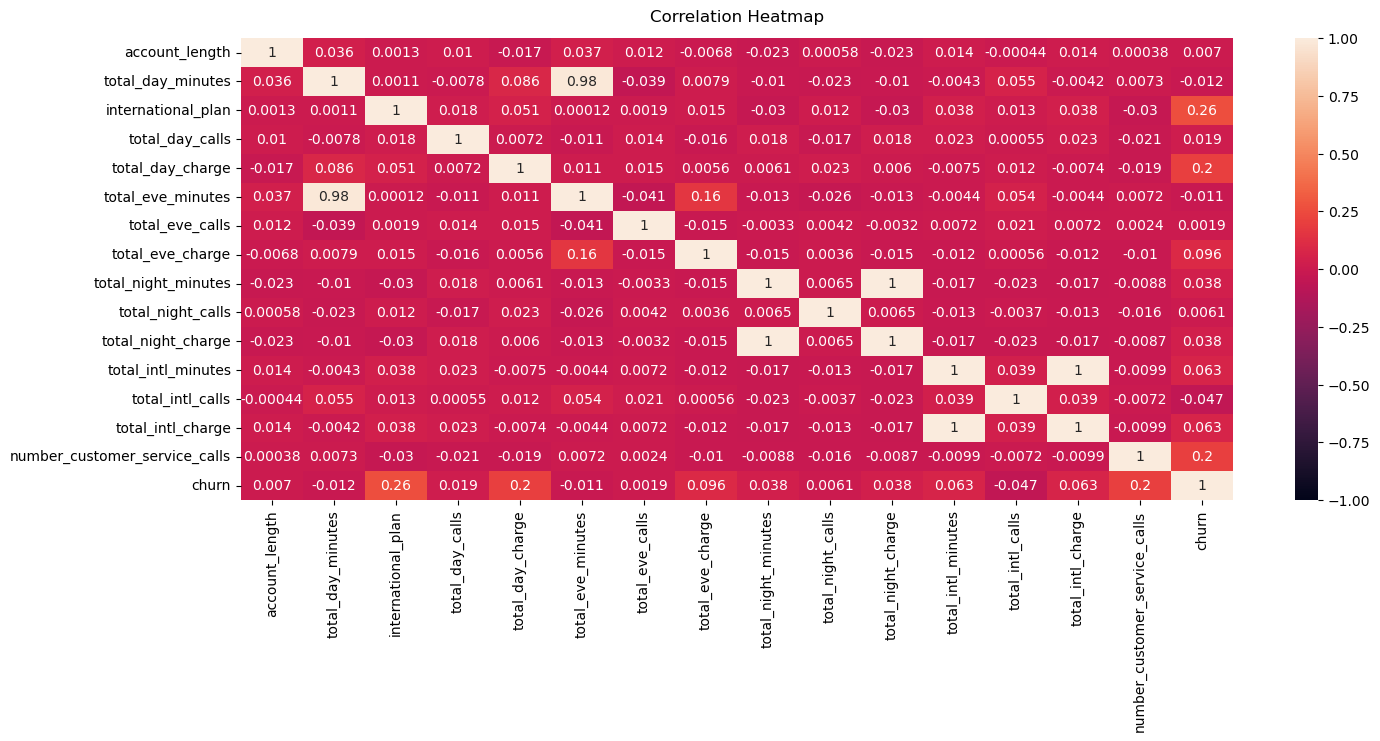

In [10]:
# Plot complete correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

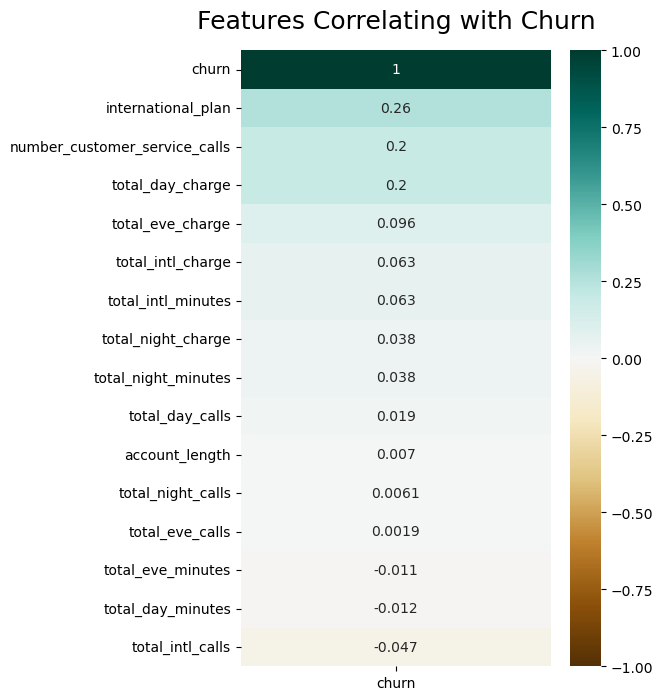

In [11]:
# Plot heatmap for features correlating with churn (note the corrected column name "churn")
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(corr_matrix[['churn']].sort_values(by='churn', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16)
plt.show()


### DECISION TREE CLASSIFICATION

In [12]:
# Clean and convert the target variable 'churn'
COlumns_needed["churn"] = COlumns_needed["churn"].astype(str).str.strip().str.lower()
COlumns_needed["churn"] = COlumns_needed["churn"].astype('category').cat.codes
COlumns_needed

C:\Users\tilak\AppData\Local\Temp\ipykernel_18020\90763774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COlumns_needed["churn"] = COlumns_needed["churn"].astype(str).str.strip().str.lower()
C:\Users\tilak\AppData\Local\Temp\ipykernel_18020\90763774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COlumns_needed["churn"] = COlumns_needed["churn"].astype('category').cat.codes


,account_length,total_day_minutes,international_plan,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,125.0,2013.4,0,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0
1,108.0,291.6,0,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,1
2,82.0,300.3,0,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,1
3,100.0,110.3,0,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,0
4,83.0,337.4,0,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,144.0,106.4,0,109.0,18.09,108.1,113.0,9.19,208.4,111,9.38,10.1,5.0,2.73,1.0,0
3329,69.0,155.0,0,98.0,26.35,209.9,105.0,12.10,143.7,117,6.47,5.9,4.0,1.59,1.0,0
3330,100.0,174.5,0,98.0,29.67,180.2,103.0,15.32,179.0,89,8.06,10.7,2.0,2.89,2.0,0
3331,39.0,2039.6,0,68.0,27.27,1034.6,103.0,8.72,235.3,106,10.59,9.1,5.0,2.46,2.0,0


In [13]:
# Separate features and target; use .values to work with NumPy arrays
X = COlumns_needed.drop("churn", axis=1)
y = COlumns_needed["churn"]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.3, random_state=222)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8847472150814053


In [14]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1985   16]
 [ 253   80]]


In [15]:
Test_df =pd.read_csv(r"D:\portfolio projects\python\tlecom\Churners.csv")
Test_df.head()

,state,account_length,area_code,interantional_plans,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,UT,93,area_code_415,no,no,0,174.1,127,29.60,176.8,73,15.03,240.0,111,10.80,10.7,3,2.89,0
1,SD,39,area_code_408,no,no,0,179.0,88,30.43,148.2,124,12.60,146.8,116,6.61,8.8,4,2.38,2
2,KY,124,area_code_408,no,no,0,156.9,74,26.67,195.8,82,16.64,181.0,99,8.15,8.8,2,2.38,1
3,MS,162,area_code_415,yes,no,0,172.1,138,29.26,165.9,93,14.10,279.0,81,12.56,9.2,6,2.48,2
4,AK,112,area_code_415,no,yes,31,142.9,92,24.29,233.8,107,19.87,329.2,142,14.81,10.4,6,2.81,0


In [21]:
# Rename column if misspelled (if present)
if 'interantional_plans' in Test_df.columns:
    Test_df.rename(columns={"interantional_plans": "international_plan"}, inplace=True)
    
cols_pred = ['account_length', 'total_day_minutes', 'international_plan', 'total_day_calls', 
             'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 
             'total_night_minutes', 'total_night_calls', 'total_night_charge', 
             'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 
             'number_customer_service_calls']
Pred_data = Test_df[cols_pred].copy()


In [22]:
Pred_data["international_plan"] = Pred_data["international_plan"].astype(str).str.strip().str.lower()
Pred_data["international_plan"] = Pred_data["international_plan"].astype('category').cat.codes


In [23]:
# Check for missing values in prediction data
print("Missing values in prediction data:\n", Pred_data.isnull().sum())

Missing values in prediction data:
 account_length                   0
total_day_minutes                0
international_plan               0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64


In [24]:
churn_pred = clf.predict(Pred_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [25]:
print("First 20 Predictions:\n", churn_pred[0:20])


First 20 Predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
print("First 100 Predictions:\n", churn_pred[0:100])

First 100 Predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [28]:
# Adding the churn prediction as a new column
Pred_data['Churn(1-Y/0-N)'] = churn_pred
print("Prediction data with churn column:\n", Pred_data.head())

Prediction data with churn column:
    account_length  total_day_minutes  international_plan  total_day_calls  \
0              93              174.1                   0              127   
1              39              179.0                   0               88   
2             124              156.9                   0               74   
3             162              172.1                   1              138   
4             112              142.9                   0               92   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             29.60              176.8               73             15.03   
1             30.43              148.2              124             12.60   
2             26.67              195.8               82             16.64   
3             29.26              165.9               93             14.10   
4             24.29              233.8              107             19.87   

   total_night_minutes  total_night_ca

In [29]:
# Print count of churn predictions
print("Count of No churn predictions:", Pred_data['Churn(1-Y/0-N)'].value_counts().get(0, 0))
print("Count of Yes churn predictions:", Pred_data['Churn(1-Y/0-N)'].value_counts().get(1, 0))


Count of No churn predictions: 1529
Count of Yes churn predictions: 72


In [35]:
# Join state information from original prediction DataFrame
Pred_data = Pred_data.join(Test_df["state"], rsuffix='_joined')
print("Prediction data after joining state:\n", Pred_data.head())

Prediction data after joining state:
    account_length  total_day_minutes  international_plan  total_day_calls  \
0              93              174.1                   0              127   
1              39              179.0                   0               88   
2             124              156.9                   0               74   
3             162              172.1                   1              138   
4             112              142.9                   0               92   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             29.60              176.8               73             15.03   
1             30.43              148.2              124             12.60   
2             26.67              195.8               82             16.64   
3             29.26              165.9               93             14.10   
4             24.29              233.8              107             19.87   

   total_night_minutes  total_night_

In [36]:
# Filter and display the states where churn is predicted as "Yes"
churn_states = Pred_data[Pred_data['Churn(1-Y/0-N)'] == 1]['state']
print("States with predicted churn (Yes):\n", churn_states)

States with predicted churn (Yes):
 34      WA
71      AK
73      TN
99      OR
109     TX
        ..
1510    NJ
1529    AL
1538    AL
1567    DE
1598    KS
Name: state, Length: 72, dtype: object


In [37]:
# Count the unique states
uniq_states = Pred_data["state"].nunique()
print("Number of unique states:", uniq_states)

Number of unique states: 51


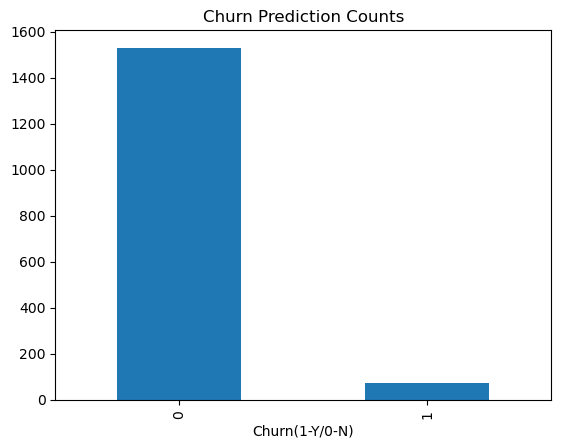

In [38]:
# Plot the distribution of churn predictions
Pred_data['Churn(1-Y/0-N)'].value_counts().plot(kind='bar')
plt.title('Churn Prediction Counts')
plt.show()

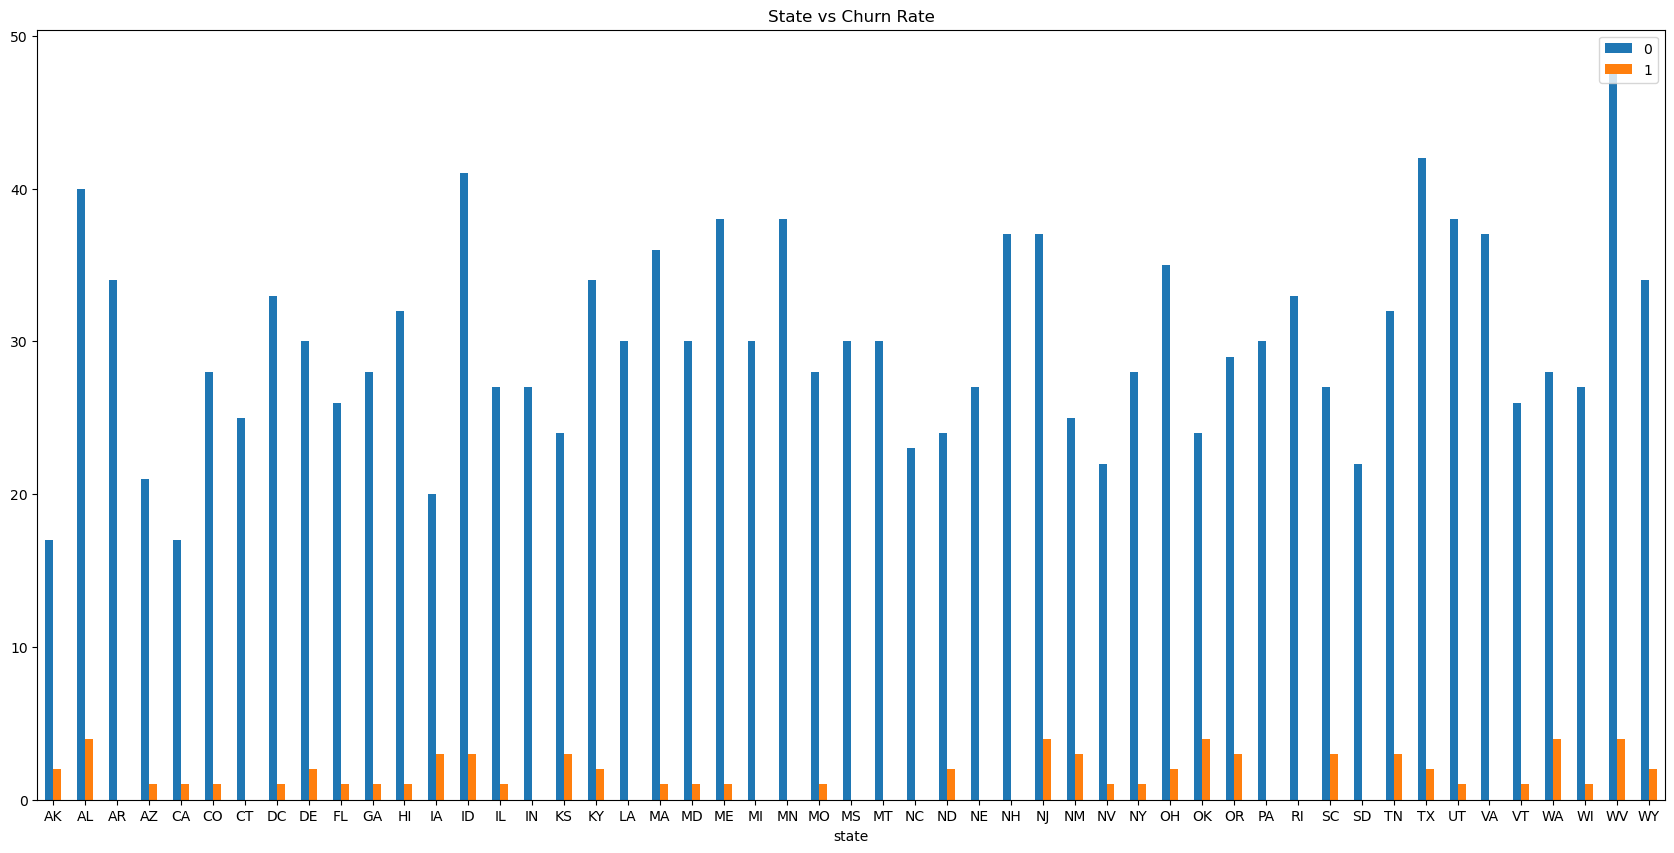

In [45]:
# Plot churn rate per state
ax = Pred_data.groupby(['Churn(1-Y/0-N)', 'state'])['state'].count().unstack(0).plot.bar(title="State vs Churn Rate", figsize=(21,10))
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()
